In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [46]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'HP', 'Weight', 'Accelaration', 'Model Year', 'Origin']
raw_dataset= pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep = " ", skipinitialspace=True)
dataset= raw_dataset.copy()
dataset.head()


,MPG,Cylinders,Displacement,HP,Weight,Accelaration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [47]:
dataset.tail()

,MPG,Cylinders,Displacement,HP,Weight,Accelaration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [48]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
HP              6
Weight          0
Accelaration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
Origin = dataset.pop('Origin')

In [0]:
dataset['USA']=(Origin==1)*1.0
dataset['Europe']=(Origin==2)*1.0
dataset['Japan']=(Origin==3)*1.0


In [51]:
dataset.tail()

,MPG,Cylinders,Displacement,HP,Weight,Accelaration,Model Year,Origin,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1.0,0.0,0.0


In [0]:
train_dataset= dataset.sample(frac=0.8, random_state=0)
test_dataset=dataset.drop(train_dataset.index)

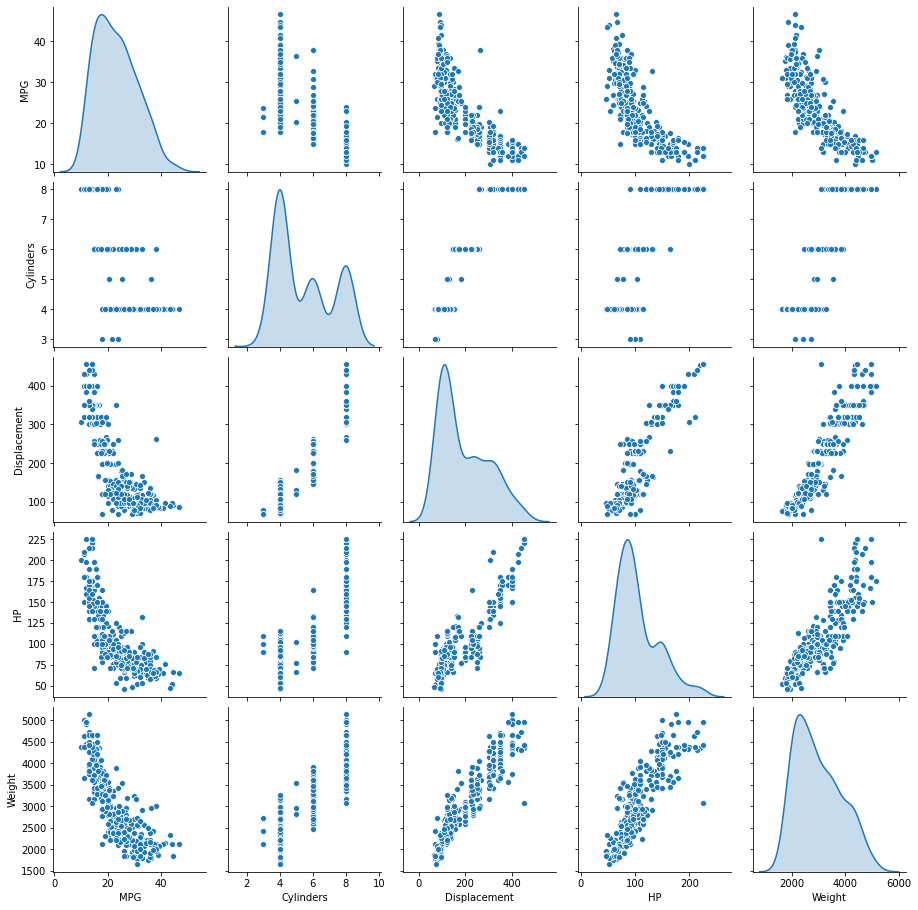

In [53]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'HP', 'Weight']], diag_kind = 'kde' )

In [54]:
train_stats=train_dataset.describe()
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
HP,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Accelaration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0


In [0]:
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [56]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [57]:
train_dataset

,Cylinders,Displacement,HP,Weight,Accelaration,Model Year,Origin,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,3,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,1.0,0.0,0.0
229,8,400.0,180.0,4220.0,11.1,77,1,1.0,0.0,0.0
150,4,108.0,93.0,2391.0,15.5,74,3,0.0,0.0,1.0
145,4,83.0,61.0,2003.0,19.0,74,3,0.0,0.0,1.0


In [0]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [63]:
normed_train_data

,Accelaration,Cylinders,Displacement,Europe,HP,Japan,MPG,Model Year,Origin,USA,Weight
146,-0.379759,-0.869348,-1.009459,-0.465148,-0.784052,-0.495225,NaN,-0.516397,-0.715676,0.774676,-1.025303
282,0.624102,-0.869348,-0.530218,-0.465148,-0.442811,-0.495225,NaN,0.843910,-0.715676,0.774676,-0.118796
69,-0.738281,1.483887,1.482595,-0.465148,1.447140,-0.495225,NaN,-1.060519,-0.715676,0.774676,1.736877
378,-0.308055,-0.869348,-0.865687,-0.465148,-1.099044,-0.495225,NaN,1.660094,-0.715676,0.774676,-1.025303
331,0.875068,-0.869348,-0.942365,-0.465148,-0.994047,2.012852,NaN,1.115971,1.781239,-1.286751,-1.001603
...,...,...,...,...,...,...,...,...,...,...,...
281,0.946772,0.307270,0.044872,-0.465148,-0.521559,-0.495225,NaN,0.843910,-0.715676,0.774676,-0.000298
229,-1.598734,1.483887,1.961837,-0.465148,1.972127,-0.495225,NaN,0.299787,-0.715676,0.774676,1.457223
150,-0.021237,-0.869348,-0.836932,-0.465148,-0.311564,2.012852,NaN,-0.516397,1.781239,-1.286751,-0.710099
145,1.233589,-0.869348,-1.076553,-0.465148,-1.151543,2.012852,NaN,-0.516397,1.781239,-1.286751,-1.169870


In [73]:
def build_model():
  model=keras.models.Sequential([
                                    layers.Dense(64, activation='relu', input_shape=len(train_dataset.keys)),
                                    layers.Dense(64, activation='relu')
                                    layers.Dense(1)
                                  ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(optimizer='optimizer',
              loss='mse',
              metrics='mae', 'mse')
  return model

SyntaxError: ignored